Objective: Develop a machine learning model to
# classify restaurants based on their cuisines.

USING RANDOM FOREST AND SVM

In [1]:
#following code is provided considering the cusine column was to be encoded as a single label but the code for multilabel is also provided in
#commented out lines

In [ ]:
#import libraries
#for calculations
import numpy as np
#for handling data : missing values ,etc
#data manipulation and analysis. : pd
import pandas as pd




In [ ]:
!pip install Keras-Preprocessing
import numpy as np
#to create checkpoints for model using tenserflow tool instead of file uplodation
from tensorflow.keras.callbacks import ModelCheckpoint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00


to read the CSV file loading it into collab.


In [ ]:
#from google.colab import files
#file = files.upload()
#if not mounting google drive

In [ ]:
#data = pd.read_csv('df.csv',engine='python',encoding='UTF-8')

to avoid reuploading every session:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file='/content/drive/MyDrive/data_cognifyz/Dataset .csv'

In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/data_cognifyz/Dataset .csv')

In [ ]:
#total no of rows and columns
data1.shape

(9551, 21)

In [ ]:
#check null value exist or not
data1.isnull()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9549,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Two sum method:

In [ ]:
#obtaining  total no of null values in each col
data1.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

cuisine has 9 NULL values

In [ ]:
#total null values :
data1.isnull().sum().sum()

9

missing values in categorial variable : 1) replace by mode if insignificant null values i.e. fill in most frequent values  ,2)Fill NaN (df.fillna()) or ignore ,3)predictive filling,4)fill category with probability,5)one-hot-encoding: to maintain history of missingness,6)KNN models

In [ ]:
#for preprocessing data  : use of utility functions
# single label
from sklearn.preprocessing import LabelEncoder
#Multiple target label for one value
from sklearn.preprocessing import MultiLabelBinarizer,StandardScaler
from sklearn.impute import SimpleImputer
#SimpleImputer : replace missing values with a specified "strategy"
#LaabelEncoder : encodes categorial variables into numerical values
#MultiLableBinarizer : binary encoding of categorial variables in multiple labels.
#.fit_transform(data[[]]) : tranformer class to help with downstream estimations



Here I have decided to **fill in with most frequent values as** : 1) Since the number of missing values is small (only 9 out of 9000),unlikely to introduce significant bias into the dataset, especially if the mode is a reasonable representation of the typical cuisine in the dataset or 2)chnage the distribution curve.3)It maintains the categorical nature of the variable and ensures that each restaurant is assigned to a known cuisine category.


In [ ]:
#Handling missing value by "mode impute method :"
imputer = SimpleImputer(strategy='most_frequent')
data1['Cuisines'] = imputer.fit_transform(data1[['Cuisines']])


In [ ]:
##checking if missing values removed or not
#data1.isnull().sum()
data1.isnull().sum().sum()

0

In [ ]:
print(data1.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [ ]:
#convert multi-lable cuisines to list :
#data1['Cuisines']=data1['Cuisines'].apply(lambda x: x.split(','))
#data1.head()
#print(data1['Cuisines'])

In [ ]:
#converting categorial variables to numerical encoding for further  tasks
#for single label values in column/rows
label_encoder = LabelEncoder()
#creating a new col to stored the encoded value in order to not lose the original data
#to convert the col cuisines to an numpy_arr we use : .to_numpy()
#using 1D array and avoid data conversion warnings
#creating a new col to stored the encoded value in order to not lose the original data
#using 1D array and avoid data conversion warnings
cuisine_list = data1['Cuisines']
data1['Cuisines_encoded'] =label_encoder.fit_transform(cuisine_list)


In [ ]:
#converting categorial variables to binary encoding for further ease of downstream tasks
#doing Multiple label's Binarization
#Multi_encoding = MultiLabelBinarizer()
#creating a new col to stored the encoded value in order to not lose the original data
#cuisine_encoded  = Multi_encoding.fit_transform(data1['Cuisines'])
#creating a new df to be added to the original data
#cuisine_df = pd.DataFrame(cuisine_encoded,columns = Multi_encoding.classes_)


In [ ]:
encoded_list = data1['Cuisines_encoded']
#print the value of binary encoding of element one in cuisine_encoded list
encoded_list[1]

1111

In [ ]:
#dropping all non-numeric values in originl dataframe
data1.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Cuisines_encoded          int64
dtype: object

In [ ]:
#to avoid losses in original dataFrame
data1_processed = pd.DataFrame(data1)
data1_processed.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Cuisines_encoded'],
      dtype='object')

In [ ]:
#dropping col not needed for classification anymore after encoding : non-numeric removal
# Drop columns
columns_to_drop = ['Restaurant ID', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose','Cuisines',
                   'Longitude', 'Latitude', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now',
                   'Switch to order menu', 'Rating color','Aggregate rating','Price range', 'Rating text', 'Votes']
data1_processed.drop(columns=columns_to_drop,axis=1, inplace=True)


In [ ]:
data1_processed.head()

,Restaurant Name,Average Cost for two,Cuisines_encoded
0,Le Petit Souffle,1100,920
1,Izakaya Kikufuji,1200,1111
2,Heat - Edsa Shangri-La,4000,1671
3,Ooma,1500,1126
4,Sambo Kojin,1500,1122


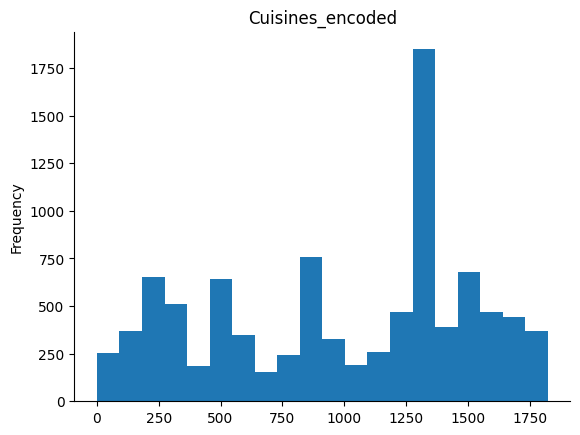

In [ ]:
# @title Cuisines_encoded

from matplotlib import pyplot as plt
data1_processed['Cuisines_encoded'].plot(kind='hist', bins=20, title='Cuisines_encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

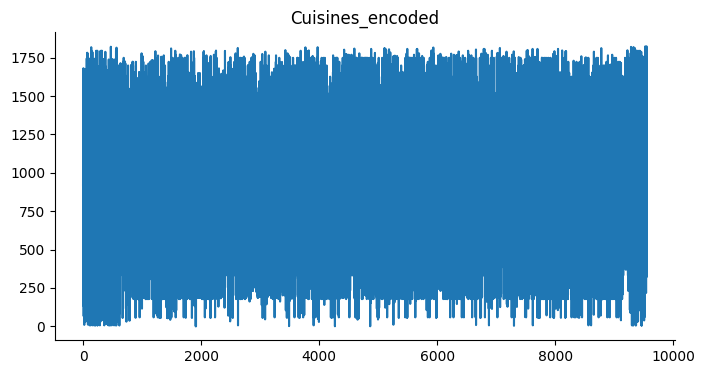

In [ ]:
# @title Cuisines_encoded

from matplotlib import pyplot as plt
data1_processed['Cuisines_encoded'].plot(kind='line', figsize=(8, 4), title='Cuisines_encoded')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
data1_processed['Restaurant Name']

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                 Naml۱ Gurme
9547                Ceviz A��ac۱
9548                       Huqqa
9549                 A���k Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

In [ ]:
#we need only numeric data for downstream classification while using RF
label_encoder = LabelEncoder()
data1_processed['Restaurant Name'] = label_encoder.fit_transform(data1_processed['Restaurant Name'])
data1_processed.head()

,Restaurant Name,Average Cost for two,Cuisines_encoded
0,3748,1100,920
1,3172,1200,1111
2,2896,4000,1671
3,4707,1500,1126
4,5523,1500,1122


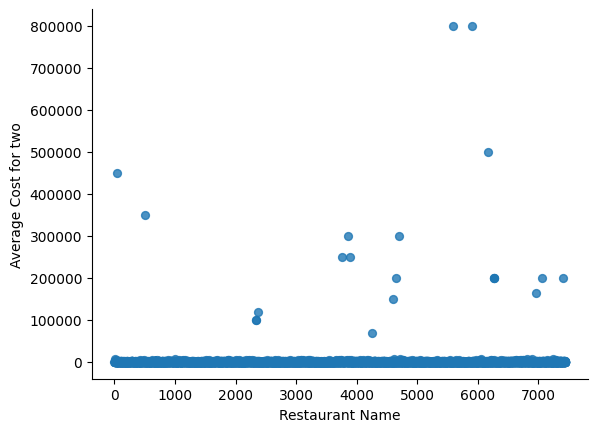

In [ ]:
# @title Restaurant Name vs Average Cost for two

from matplotlib import pyplot as plt
data1_processed.plot(kind='scatter', x='Restaurant Name', y='Average Cost for two', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data1_processed.isna().sum()

Restaurant Name         0
Average Cost for two    0
Cuisines_encoded        0
dtype: int64

2.SPLITTING : TRAINING AND TESTING SET

In [ ]:
#class implements the Transformer "train_test_split" from sklearn.model_selection class
from sklearn.model_selection import train_test_split , GridSearchCV
#25% test set and 75% training tests.


In [ ]:
#single target class for each label :
X = data1_processed.drop('Cuisines_encoded',axis=1)
y = data1_processed['Cuisines_encoded']

In [ ]:
#for multi class binary classification
#assigning predicator and target variables
#separate the features (independent variables) from the target variable.
#everything in dataset except the encoded classes used to train the model
#X= data1_processed.drop(columns = Multi_encoding.classes_)
#y = data1_processed[Multi_encoding.classes_]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=104)


In [ ]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 7163
Testing set size: 2388


# 3.CLASSIFICATION MODEL:

As the dataset is big,some good classsification model choices are Random forest and gradient boosting,due ability to handle large dataset with high dimensionality and we have multiple labels here,as Random forest being an ensemble learner that build multiple decisions trees and combines their predictions it leads to  better generalization,I will be **using Random forest**

In [ ]:
#In a multi-output problem, each sample can have multiple target variables,
#and each target variable can have more than one class or continuous value.
#here we have multi-label classification problem where each restaurant can have multiple cuisines.
#so we use a wrapper like MultiOutputClassifier : in scikit-learn
#-allows to use single-output estimators (classifiers or regressors) for multi-output problems.


In [ ]:
#from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
#initialising classifier
#keeping the no_of_tree = 100 to keep balance b/w avoiding overfiting and better generalization
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, random_state=42)
#training the RF algo on training data :#for single lable output
rf_classifier.fit(X_train,y_train)
#estimator : rf :  single-output estimator used for each output separately & #-1 will use all available CPU cores and fasten the process
#multi_target_rf = MultiOutputClassifier(rf_classifier, n_jobs = -1)
#training the multiple output classifier :
#multi_target_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

4 **PERFORMANCE MEASURE** : checking missclassification error metrics(accuracy,precision,recall)

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score,f1_score

In [ ]:
#accuracy
accuracy = accuracy_score(y_pred,y_test)
print("accuracy : ",accuracy)

accuracy :  0.23534338358458962


In [ ]:
#precision
precision = precision_score(y_pred,y_test,average='weighted')
print("precision : ",precision)


precision :  0.28869241762772735


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#recall
recall = recall_score(y_pred,y_test,average='weighted')
print("recall : ",recall)

recall :  0.23534338358458962


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1 = f1_score(y_test, y_pred, average='weighted')
print("f1_score : ",f1)

f1_score :  0.21797806736063233


5)ANALYZING performance

In [ ]:
performance_by_cuisine = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}
import matplotlib.pyplot as plt


In [ ]:
performance_df = pd.DataFrame.from_dict(performance_by_cuisine, orient='index')

<Figure size 1000x600 with 0 Axes>

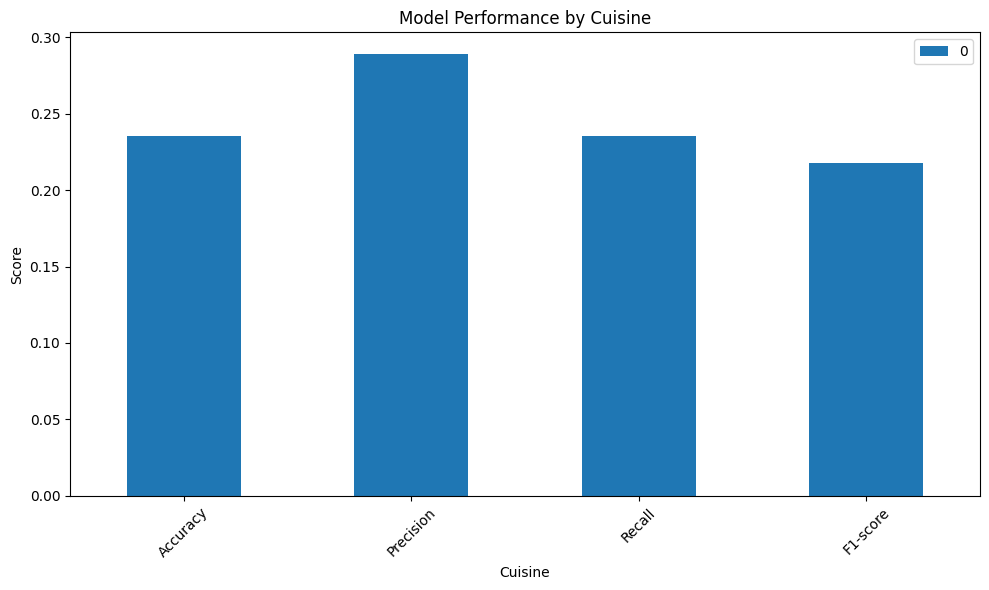

In [ ]:
# Plot performance metrics
plt.figure(figsize=(10, 6))
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance by Cuisine")
plt.xlabel("Cuisine")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

4.2 Optimize accuracy

In [ ]:
#to enhance accuracy :
#hyperparameter tuning and model selection using GridSearchCV :
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
#pipeline is a sequence of data processing steps chained together
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])
#Standardization : a preprocessing transformer that standardizes features by removing the mean and scaling to unit variance.

In [ ]:
# Define hyperparameters to tune # -- : represents we are tuning prameters for step 2 classifier model of pipeline
param_distri = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

In [ ]:
# Perform randomized search cross-validation
random_search = RandomizedSearchCV(pipeline, param_distri, n_iter=10, cv=2, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'classifier__max_depth': [None, 10, 20],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [100, 200,
                                                                     300]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Best hyperparameters found
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__max_depth': 10}


In [ ]:
best_model = random_search.best_estimator_

In [ ]:
#testing the trained rf_classifier on testing set : X_test and stored in y_pred later to be compared with y_test to measure performance
y_pred_o = best_model.predict(X_test)

In [ ]:
#accuracy:
accuracy_o = accuracy_score(y_pred_o,y_test)
print("accuracy optimized : ",accuracy_o)

accuracy optimized :  0.22445561139028475


Here we see **precision**  gets optimized from **0.288 to 0.45**

In [ ]:
precision_o = precision_score(y_pred_o,y_test,average='weighted')
print("precision_optimized: ",precision_o)

precision_optimized:  0.4540018164161856


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
recall_o = recall_score(y_pred_o,y_test,average='weighted')
print("recall optimized : ",recall_o)

recall optimized :  0.22445561139028475


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_o = f1_score(y_pred_o,y_test,average='weighted')
print("F1-SCORE_O : ",f1_o)

F1-SCORE_O :  0.2632846304636753


SVM classifier

In [ ]:
from sklearn.svm import SVC
from scipy.stats import reciprocal, uniform

svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')

In [ ]:
svm_classifier.fit(X_train, y_train)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.09882747068676717


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         5
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         1
          50       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SO , here we can finally conclude our analysis by stating that random forest worked better than SVM in terms of accuracy